# Homework 2 (Dev Mody)
## Exercise 3: Student Debt - Linear Regression using a single Newton Step

The data sheet `student_debt_data.csv` contains data for the US student debt as a function of the year. In this exercise we will use linear regression exactly (no gradient descent) to find the best linear fit.

### Exercise 3.1: Fit Model to Data

Fit a linear model to the data by minimizing the associated linear regression Least Squares problem using a single Newton step. The Newton step actually corresponds to solving a set of linear equations of the form $Aw = b$ for the vector $w$. As explained in class and in Watts etal the equations are:


$$\left( \sum_{p=1}^{P} \dot{\mathbf{x}}_p \dot{\mathbf{x}}_p^T \right) \mathbf{w} = \sum_{p=1}^{P} \dot{\mathbf{x}}_p y_p$$

For importing the data it is useful to use:
```python
import pandas as pd
# import the dataset
csvname = datapath + ’student_debt_data.csv’
data = np.asarray(pd.read_csv(csvname,header = None))
```
Then we can extract the input, turn the array into a column vector and insert a first column of ones:
```python
# extract input
x = data[:,0]
x.shape = (len(x),1)
# pad input with ones
o = np.ones((len(x),1))
x_new = np.concatenate((o,x),axis = 1)
```
Then we can extract the y-values:
```python
# extract input
y = data[:,1]
```
What is the dimension of the matrix you need to perform the Newton step ? Once you have the matrix, let’s call it `A`, you can calculate the inverse using `np.linalg.pinv(A)`


In [8]:
import pandas as pd
import autograd.numpy as np
import matplotlib.pyplot as plt

csvname = '/Users/devmody/Documents/Courses/3ml3/homeworks/homework2/student_debt_data.csv'
data = np.asarray(pd.read_csv(csvname,header = None))

x = data[:,0]
x.shape = (len(x),1)
ones = np.ones((len(x),1))
new_x = np.concatenate((ones,x),axis = 1)

y = data[:,1]

A = np.dot(new_x.T,new_x)
b = np.dot(new_x.T,y)
w = np.dot(np.linalg.pinv(A),b)
y_new = np.dot(new_x,w)

print("Dimensions of A:", A.ndim)



Dimensions of A: 2


ANSWER: The dimensions of the matrix $A$ in $Aw = b$ is 2, therefore implying that $A$ is a two-dimensional matrix

### Exercise 3.2: Plotting the Fit

Make a plot of the data along with the fitted line

ANSWER: The code for the plot + the plot is as shown below:

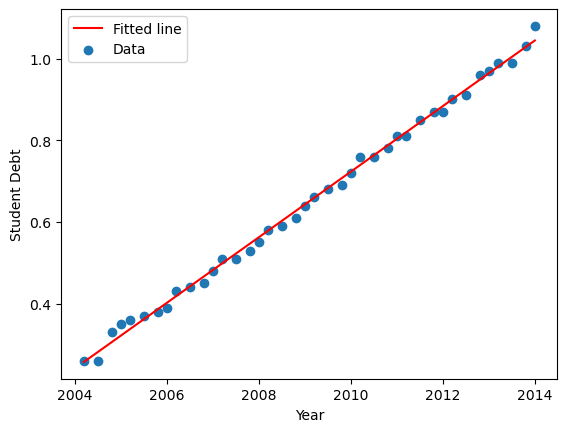

In [9]:
plt.scatter(x, y, label="Data")
plt.plot(x, y_new, color='r', label="Fitted line")
plt.xlabel("Year")
plt.ylabel("Student Debt")
plt.legend()
plt.show()

### Exercise 3.3: Future Predictions

If the trend continues, use your model to predict the total student debt in 2050 ?

ANSWER: As seen below, the total student debt in 2050, according to the model, is expected to be 3.9360119665098234 (I don't know the units :(). 

In [11]:
prediction = np.array([1,2050])
debt = np.dot(prediction,w)
print(f'Predicted total student debt in 2050 is {debt}')

Predicted total student debt in 2050 is 3.9360119665098234
